In [68]:
from bs4 import BeautifulSoup as soup
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import re
import requests
import time

In [70]:
url_list= []
for i in range (1,25):
    url_list.append(f"https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}")

In [72]:
url = url_list[0]
url

'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1'

In [74]:
uClient = urlopen(url)
page_html = uClient.read()
uClient.close()

In [75]:
page_soup = soup (page_html , features = "lxml")

In [76]:
container = page_soup.find_all("div", {"class": "tUxRFH"})

In [77]:
Data={}

In [78]:
product_list = []
for i in range(len(container)):
    product_list.append(container[i].text)

In [100]:
import requests
from bs4 import BeautifulSoup
import re
import time 


product_list = []
product_names = []
actual_price = []
offer_price = []
review_list = []
ratings_only = []
average_rating = []
brand_name = []
offer_perc = []


for page in range(1, 26):  
    url = f"https://www.flipkart.com/search?q=laptop&page={page}"
    headers = {"User-Agent": "Mozilla/5.0"}  
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to fetch page {page}")
        continue

    soup = BeautifulSoup(response.text, 'html.parser')
    container = soup.find_all("div", {"class": "tUxRFH"}) 

    for i in range(len(container)):
        
        product_list_tag = container[i].find_all("div", {"class":"KzDlHZ"})
        product = product_list_tag[0].text.strip().split(" -")[0] if product_list_tag else "n/a"
        product_list.append(product)

        
        actual_price_tag = container[i].find_all("div",{"class":"yRaY8j ZYYwLA"})
        A_price = actual_price_tag[0].text.strip() if actual_price_tag else "n/a"
        actual_price.append(A_price)

        
        offer_price_tag = container[i].find_all("div",{"class":"Nx9bqj _4b5DiR"})
        O_price = offer_price_tag[0].text.strip() if offer_price_tag else "n/a"
        offer_price.append(O_price)

        
        review_list_tag = container[i].find_all("span", {"class": "Wphh3N"})
        if review_list_tag:
            text = review_list_tag[0].text.strip()
            parts = re.split(r"\s*&\s*", text)
            ratings_only.append(parts[0].split(" ")[0] if len(parts) > 0 else "n/a")
            if len(parts) > 1:
                review_list.append(parts[1].split(" ")[0])
            else:
                review_list.append("n/a")
        else:
            ratings_only.append("n/a")
            review_list.append("n/a")

        
        average_rating_tag = container[i].find_all("div", {"class": "XQDdHH"})
        A_rating = average_rating_tag[0].text.strip() if average_rating_tag else "n/a"
        average_rating.append(A_rating)

        
        brand_name_tag = container[i].find_all("div", {"class":"KzDlHZ"})
        b_name = brand_name_tag[0].text.strip().split(" ")[0] if brand_name_tag else "n/a"
        brand_name.append(b_name)
        
        offer_perc_tag = container[i].find_all("div", {"class" : "UkUFwK"})
        O_perc = offer_perc_tag[0].text.strip() if offer_perc_tag else "n/a"
        offer_perc.append(O_perc)
    time.sleep(2)

print("Scraping complete.")


Scraping complete.


In [101]:
len(ratings_only)

576

In [102]:
len(actual_price)

576

In [103]:
len(product_list)

576

In [104]:
len(offer_price)

576

In [105]:
len(ratings_only)

576

In [106]:
Data["ProductName"] = product_names

In [107]:
df = pd.DataFrame(Data)

In [92]:
df

,ProductName


In [116]:
df = pd.DataFrame({"Product Name": product_list,
                   "Actual Price": actual_price,
                   "offer Price": offer_price,
                   "No.of Ratings" : ratings_only ,
                   "reviews" : review_list,
                    "Averager Rating" : average_rating,
                   "Brand" : brand_name,
                    "offer %": offer_perc})

In [118]:
df

,Product Name,Actual Price,offer Price,No.of Ratings,reviews,Averager Rating,Brand,offer %
0,Lenovo IdeaPad Slim 5 Intel Core i5 13th Gen 1...,"₹97,290","₹72,990",n/a,n/a,n/a,Lenovo,24% off
1,Acer Swift Go 14 Snapdragon X Plus,"₹1,08,799","₹59,990",217,40,4.4,Acer,44% off
2,Infinix Y3 Max Series Intel Core i5 12th Gen 1...,"₹69,990","₹29,990",344,66,4.3,Infinix,57% off
3,ASUS Vivobook 15 Intel Core i5 12th Gen 1235U,"₹66,990","₹44,990","7,361",412,4.2,ASUS,32% off
4,Lenovo Chromebook MediaTek Kompanio 520,"₹30,790","₹14,990","1,769",164,3.8,Lenovo,51% off
...,...,...,...,...,...,...,...,...
571,Acer Aspire 7 Intel Core i5 12th Gen 12450H,"₹83,999","₹43,999","3,734",296,4.1,Acer,47% off
572,SAMSUNG Galaxy Book5 360 AI PC Full Metal Chas...,"₹1,37,988","₹1,14,990",12,2,4.9,SAMSUNG,16% off
573,ASUS TUF Gaming A15 AMD Ryzen 5 Hexa Core 7535HS,"₹70,990","₹52,990",6,1,3.8,ASUS,25% off
574,HP Intel Intel Core i5 11th Gen 1155G7,"₹58,209","₹49,990","3,937",276,4.3,HP,14% off


In [120]:
df.to_csv("flipkart_data.csv", index=False)

In [122]:
df = pd.read_csv("flipkart_data_reduced.csv")

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
basic_stats = {
    "Total Products": len(df),
    "Unique Brands": df['brand'].nunique(),
    "Average Actual Price (₹)": df['actual_price'].mean(),
    "Average Offer Price (₹)": df['offer_price'].mean(),
    "Average Rating": df['averager_rating'].mean(),
    "Average Discount (%)": df['offer_%'].mean(),
    "Min Price (₹)": df['offer_price'].min(),
    "Max Price (₹)": df['offer_price'].max()
}

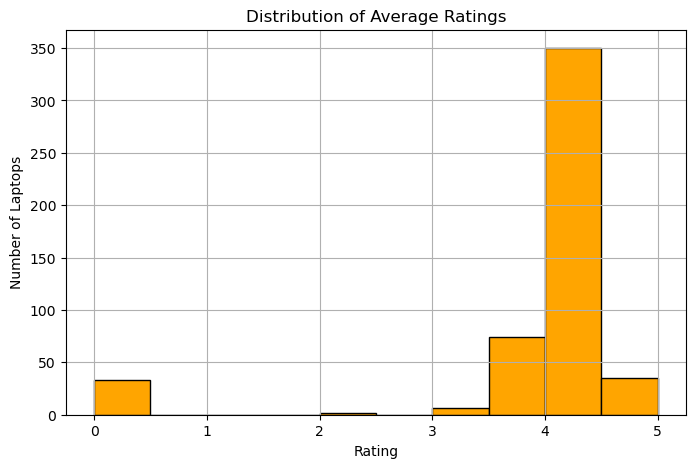

In [126]:
#  Histogram of Ratings
plt.figure(figsize=(8, 5))
plt.hist(df['averager_rating'], bins=10, edgecolor='black', color='orange')
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Laptops")
plt.grid(True)
plt.show()

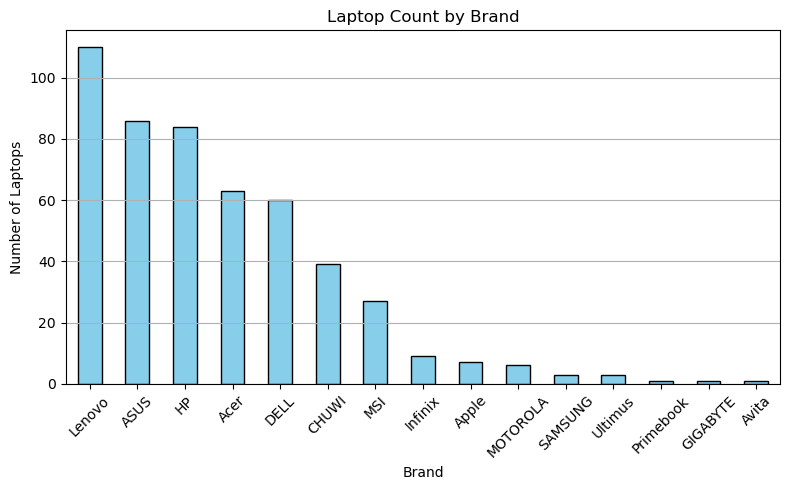

In [158]:
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(8, 5))
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Laptop Count by Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

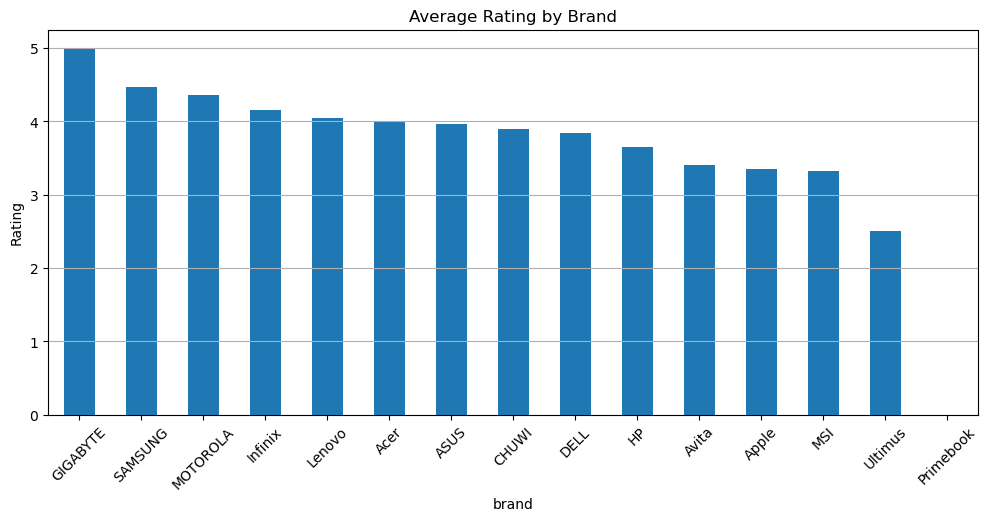

In [136]:
# Bar Chart Average Rating by Brand
plt.figure(figsize=(12, 5))
df.groupby('brand')['averager_rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Rating by Brand")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

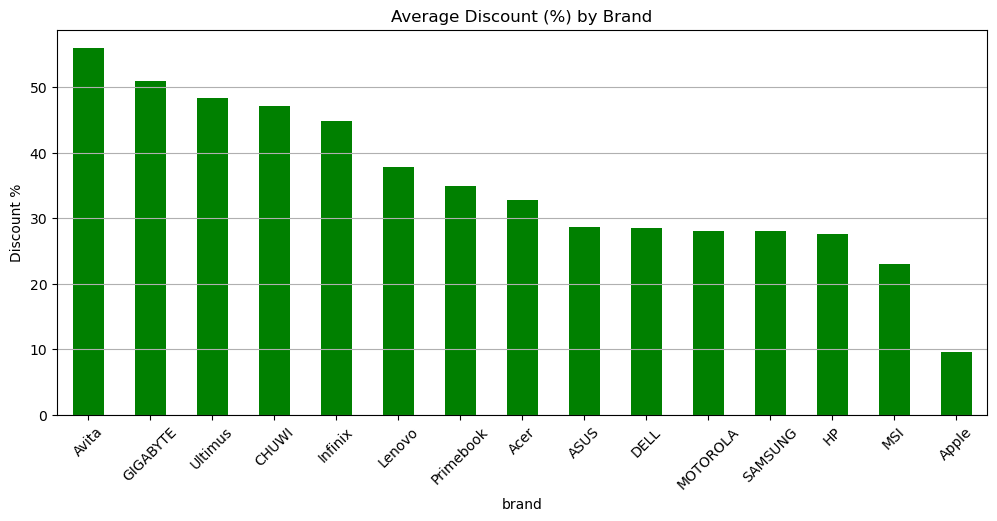

In [138]:
#  Bar Chart  Average Discount by Brand
plt.figure(figsize=(12, 5))
df.groupby('brand')['offer_%'].mean().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Average Discount (%) by Brand")
plt.ylabel("Discount %")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

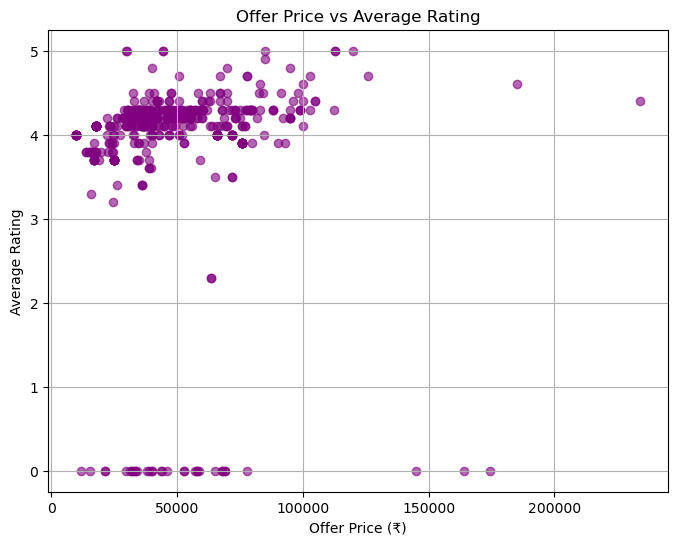

In [140]:
# Scatter Plot  Offer Price vs Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['offer_price'], df['averager_rating'], alpha=0.6, color='purple')
plt.title("Offer Price vs Average Rating")
plt.xlabel("Offer Price (₹)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

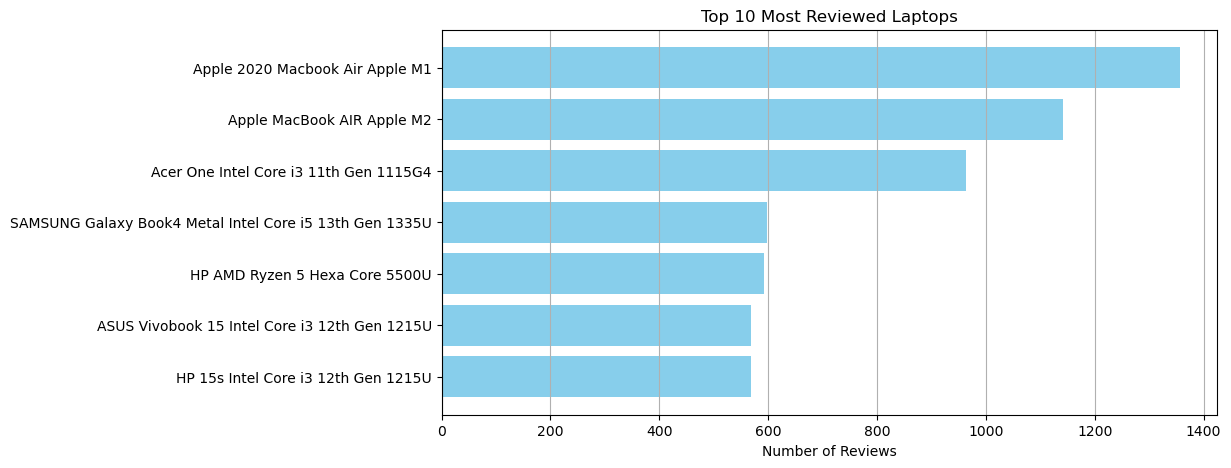

In [142]:
#  Top 10 Most Reviewed Laptops
top_reviewed = df.sort_values(by='reviews', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_reviewed['product_name'], top_reviewed['reviews'], color='skyblue')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Laptops")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

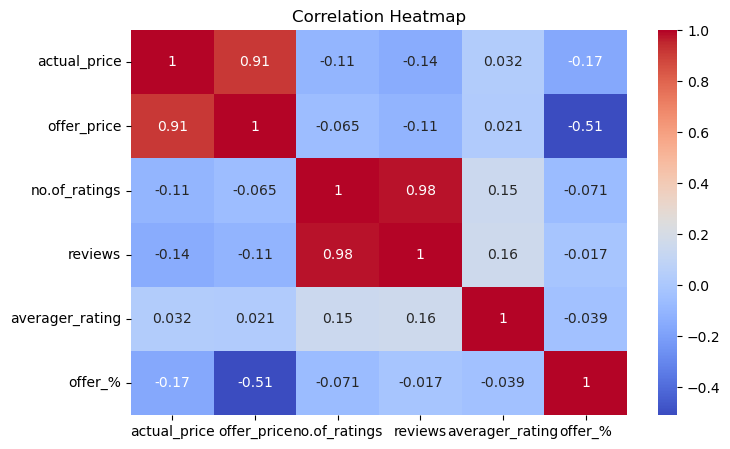

In [144]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['actual_price', 'offer_price', 'no.of_ratings', 'reviews', 'averager_rating', 'offer_%']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [146]:
summary_df = pd.DataFrame(list(basic_stats.items()), columns=["Metric", "Value"])
print(summary_df)

                     Metric        Value
0            Total Products     500.0000
1             Unique Brands      15.0000
2  Average Actual Price (₹)   71937.8100
3   Average Offer Price (₹)   48962.1380
4            Average Rating       3.8686
5      Average Discount (%)      32.3760
6             Min Price (₹)    9999.0000
7             Max Price (₹)  234000.0000
